# Лабораторная работа №3

ФИО:    Касрадзе Джамал Зурабович
Группа: БИВТ-21-5

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №7 в семестре (Занятие №3 очное)

Что необходимо сделать:  
- Обучить различного рода модели машинного обучения и сравнить их между собой  

---
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/11600OkqdRzxc-xZmFTuBs099VeAqU_GlE0Bx6bBlIRE/edit?usp=sharing) необходимо узнать название своего датасета 
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. Загрузить необходимые данные к себе и считать (read) их в переменную.
2. Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии (**если у вас многоклассовая классификация, прочтите P.S.S. внизу**).
3. Сделать предобработку данных:  
     1. Разделить выборку на тренировочную (train) и тестовую (test). _Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test_.
     2. Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара №3. P.S. Для численных и категориальных переменных будут разные стратегии.
     3. Отнормировать численные переменные (`StandardScaler`, `MinMaxScaler`).
     4. Закодировать категориальные признаки по одной из стратегий.
4. Обучить на тренировочном множестве:
     1. Линейную модель (`LogisticRegression`, `LinearRegression`)
     2. Деревянную модель (`DecisionTreeClassifier`, `DecisionTreeRegressor`) (тут советую попробовать разные глубины деревьев)
     3. K-ближайших соседей (`KNeighborsClassifier`, `KNeighborsRegressor`) (тут тоже есть смысл попробовать разные `k`)
     4. Случайный лес (`RandomForestClassifier`, `RandomForestRegressor`) 
5. Посчитайте метрики на train и test множествах:
     1. Для задачи классификации -- Accuracy, ROC-AUC (график + значение), PR-кривую (график), F1-score
     2. Для задачи регрессии -- MAE, RMSE, MAPE
6. Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:
     1. Какая модель справилась лучше с поставленной задачей?
     2. Имеет ли место переобучение?
     3. Имеет ли место недообучение?
     4. Как можно улучшить метрики моделей?

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

P.S.S.  
Если вам повезло с многоклассовой классификацией, вам будет необходимо понять, умеет ли алгоритм работать с несколькими классами одновременно (обычно они не умеют). Поэтому вам может понадобиться такая штука, как OneVsRestClassifier ([ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier)), но советую ознакомиться с этой [страницей](https://scikit-learn.org/stable/modules/multiclass.html), здесь представлена более полная информация.

## 1. Пример импорта данных. Грузим данные

In [238]:
import pandas as pd
data = pd.read_csv('../L2/dataset.csv', sep=',')  # если нужно, можно поменять разделитель
data = data.query("(PROPERTYSQFT != 2184.207862) & (PRICE < 10000000) & (PRICE > 100) & (PROPERTYSQFT < 10000) & (PROPERTYSQFT > 256)")
data.set_index("PRICE")

,BROKERTITLE,TYPE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
PRICE,,,,,,,,,,,,,,,,
315000,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,2,2.0,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
260000,Brokered by Sowae Corp,House for sale,4,2.0,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
69000,Brokered by COMPASS,Condo for sale,3,1.0,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
690000,Brokered by Sowae Corp,House for sale,5,2.0,4004.0,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725
265000,Brokered by Pantiga Group Inc.,Co-op for sale,1,1.0,750.0,875 Morrison Ave Apt 3M,"Bronx, NY 10473","875 Morrison Ave Apt 3MBronx, NY 10473",Bronx County,The Bronx,East Bronx,Morrison Avenue,Parking lot,"Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...",40.821586,-73.874089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700000,Brokered by Ilite Realty Inc,Multi-family home for sale,3,7.0,7854.0,448 40th St,"Brooklyn, NY 11232","448 40th StBrooklyn, NY 11232",United States,New York,Kings County,Brooklyn,40th Street,"448 40th St, Brooklyn, NY 11232, USA",40.651222,-74.005780
945000,Brokered by Brown Harris Stevens,Condo for sale,2,2.0,903.0,2351 Adam Clayton Powell Jr Blvd Apt 614,"Manhattan, NY 10030",2351 Adam Clayton Powell Jr Blvd Apt 614Manhat...,New York,New York County,New York,Manhattan,2351,2351 Adam Clayton Powell Jr Blvd Apartment 614...,40.816711,-73.942050
2999999,Brokered by RE MAX Edge,Multi-family home for sale,15,9.0,3600.0,2825-2827 W 15th St,"Brooklyn, NY 11224","2825-2827 W 15th StBrooklyn, NY 11224",United States,New York,Kings County,Brooklyn,West 15th Street,"2825 W 15th St, Brooklyn, NY 11224, USA",40.578450,-73.982739


## 2. Понимаем, какая перед нами задача

Нам нужно предсказать единственный параметр - цену. Это задача регрессии. Будем искать зависимость цены от некоторых категориальных и всех численных параметров.

## 3. Делаем предобработку данных

In [239]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import math
import numpy as np

cat_cols = [
    'TYPE', 
    'ADMINISTRATIVE_AREA_LEVEL_2',
    'LOCALITY',
    'SUBLOCALITY',
]
num_cols = [
    'BEDS',
    'BATH',
    'PROPERTYSQFT',
    'LATITUDE',
    'LONGITUDE'
]
X = data.drop(['PRICE'], axis=1)
X_num = X[num_cols]
X_cat = pd.get_dummies(X[cat_cols])
X = X_num.join(X_cat)
y = np.log(data['PRICE'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.apply(lambda x: x.nunique())

BEDS                             20
BATH                             14
PROPERTYSQFT                   1143
LATITUDE                       2206
LONGITUDE                      2181
                               ... 
SUBLOCALITY_Richmond County       2
SUBLOCALITY_Riverdale             2
SUBLOCALITY_Snyder Avenue         2
SUBLOCALITY_Staten Island         2
SUBLOCALITY_The Bronx             2
Length: 70, dtype: int64

## 4. Обучить на тренировочном множестве


In [240]:
solutions = []
#A Линейная регрессия
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [241]:
#B Древо решений
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [242]:
#C k-ближайших соседей
from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor()
KNR.fit(X_train, y_train)

KNeighborsRegressor()

In [243]:
#D Случайный лес
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)

RandomForestRegressor()

## 5. Метрики

In [244]:
def comparator(y, y_pred):
    x = list(range(1, len(y)+1))
    fig = plt.figure()
    ax = plt.gca()
    ax.plot(x, y, 'o', c='blue', alpha=0.05)
    ax.plot(x, y_pred, 'o', c='red', alpha=0.05)
    #ax.set_yscale('log')
    #ax.set_xscale('log')

NAME 			TEST ERR 		TRAIN ERR
Linear Regression:
	MAE:  		0.34689450164871827 	0.33611902281462536
	RMSE:  		0.45579304392179554 	0.4510882830051698
	MAPE:  		0.025048777753158724 	0.02452827386082635
Decision Tree Regressor:
	MAE:  		0.32323707178878 	0.00025505902620688754
	RMSE:  		0.4686230699118689 	0.00612576731711452
	MAPE:  		0.023480375904829435 	2.186944819134397e-05
K Neighbors Regressor:
	MAE:  		0.4652621811214494 	0.37721457306888134
	RMSE:  		0.6045143185797007 	0.48579054437251457
	MAPE:  		0.03345850779908428 	0.02737892617919348
Random Forest Regressor:
	MAE:  		0.23598609479121332 	0.08474660934196847
	RMSE:  		0.320941037324007 	0.12276997687642317
	MAPE:  		0.017140910619451645 	0.006207103430249439


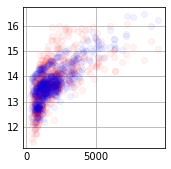

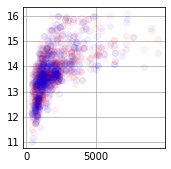

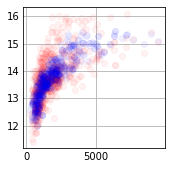

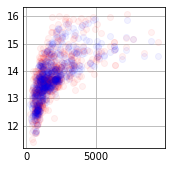

In [245]:
import sklearn.metrics as metrics

solutions = [
    ('Linear Regression:', lin_reg),
    ('Decision Tree Regressor:', tree),
    ('K Neighbors Regressor:', KNR),
    ('Random Forest Regressor:', RFR)
]
print("NAME \t\t\tTEST ERR \t\tTRAIN ERR")
template = "\t{0} \t\t{1} \t{2}"
for name, func in solutions:
    print(name)
    yTR_pred = func.predict(X_train)
    yTE_pred = func.predict(X_test)
    fig = plt.figure()
    ax = plt.gca()
    ax.plot(X_test['PROPERTYSQFT'], y_test, 'o', c='red', alpha=0.05)
    ax.plot(X_test['PROPERTYSQFT'], yTE_pred, 'o', c='blue', alpha=0.05)
    #plot_prediction(xTE_scaled, yTE, yTE_pred)
    print(template.format(
          "MAE: ",
          metrics.mean_absolute_error(y_test, yTE_pred),
          metrics.mean_absolute_error(y_train, yTR_pred)
    ))
    print(template.format(
          "RMSE: ",
          metrics.root_mean_squared_error(y_test, yTE_pred),
          metrics.root_mean_squared_error(y_train, yTR_pred)
    ))
    print(template.format(
          "MAPE: ",
          metrics.mean_absolute_percentage_error(y_test, yTE_pred),
          metrics.mean_absolute_percentage_error(y_train, yTR_pred)
    ))

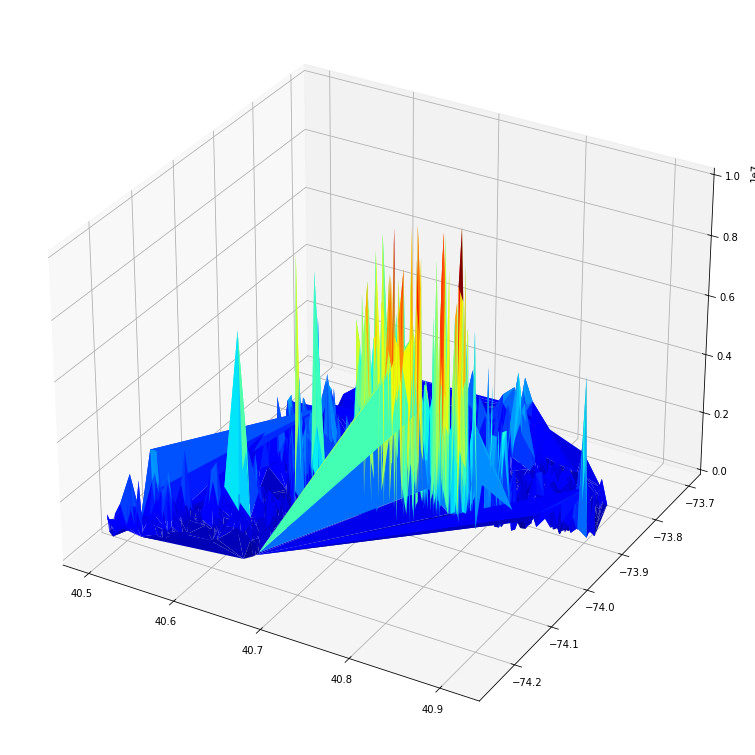

In [246]:
#было интересно на карту взглянуть
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits import mplot3d

x = X['LATITUDE']
y = X['LONGITUDE']
z = data['PRICE']

# Plot
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
fig.set_size_inches(18.5, 10.5)
ax.plot_trisurf(x, y, z, vmin=z.min() * 2, cmap=cm.jet, linewidth=0.1)
plt.show()

## 6. Сравнение

Модели явно успешно справляются с задачей. Следов переобучения не видно, ошибки на тренировочных значениях сравнимые с тестовыми. Недообучения так же не наблюдается, значения на тестовом множестве приемлемые, опять же сравнимые с тренировочными. Лучше всех справилась модель Random Forest Regressor. Метрики наверняка можно улучшить, регулируя доп параметры, такие как глубина дерева. Либо же можно расширить датасет.